## Data Analysis of Aarhusbolig

In [ ]:
# ✅ Essential imports for Aarhusbolig analysis notebook

import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Static plotting

# Install seaborn if not already installed

import seaborn as sns  # Statistical plotting
import warnings  # Warning control

# Optional: suppress warnings for cleaner notebook output
warnings.filterwarnings("ignore")

#### Extract

In [4]:
companies = pd.read_csv("../data/Bronze/companies.csv")
tenancies = pd.read_csv("../data/Bronze/tenancies.csv")
departments = pd.read_csv("../data/Bronze/departments.csv")

In [ ]:
tenancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391 entries, 0 to 2390
Data columns (total 82 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   CompanyId                                               2391 non-null   int64  
 1   DepartmentId                                            2391 non-null   int64  
 2   TenancyId                                               2391 non-null   int64  
 3   TenancyType                                             2391 non-null   object 
 4   TenancyTypeId                                           2391 non-null   int64  
 5   ApartmentType                                           2391 non-null   object 
 6   ApartmentTypeId                                         2391 non-null   int64  
 7   PetAllowedText                                          2380 non-null   object 
 8   IsAvailable                           

In [ ]:
tenancies

,CompanyId,DepartmentId,TenancyId,TenancyType,TenancyTypeId,ApartmentType,ApartmentTypeId,PetAllowedText,IsAvailable,IsStandard,...,Rents.A/C El,Rents.Individuel råderet,Rents.A-C el,Rents.Strøm til skur,Rents.Råderetsarbejde,Rents.Aconto vand/Vandafled.,Rents.Vandafledningsafgift,Rents.Antenne grundpakke,Rents.Diverse,Rents.Antenne
0,698,1,230,Familiebolig,1,Lejlighed,1,Det er ikke tilladt at holde husdyr.,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,698,1,230,Familiebolig,1,Lejlighed,1,Det er ikke tilladt at holde husdyr.,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,698,1,230,Familiebolig,1,Lejlighed,1,Det er ikke tilladt at holde husdyr eller modt...,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,698,1,230,Familiebolig,1,Lejlighed,1,Det er ikke tilladt at holde husdyr eller modt...,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,698,1,333,Familiebolig,1,Lejlighed,1,Det er ikke tilladt at holde husdyr.,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,289,13,3060,Familiebolig,1,Rækkehus,2,Det er tilladt at holde to husdyr pr. husstand...,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2387,289,13,3003,Familiebolig,1,Rækkehus,2,Det er tilladt at holde to husdyr pr. husstand...,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2388,289,13,3006,Familiebolig,1,Rækkehus,2,Det er tilladt at holde to husdyr pr. husstand...,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2389,289,13,3002,Familiebolig,1,Lejlighed,1,Det er tilladt at holde to husdyr pr. husstand...,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CompanyId  12 non-null     int64  
 1   Name       12 non-null     object 
 2   Street     12 non-null     object 
 3   Location   12 non-null     object 
 4   ZipCode    12 non-null     int64  
 5   City       12 non-null     object 
 6   Lat        12 non-null     float64
 7   Lng        12 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 900.0+ bytes


In [7]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CompanyId     461 non-null    int64  
 1   DepartmentId  461 non-null    int64  
 2   Street        439 non-null    object 
 3   ZipCode       461 non-null    int64  
 4   City          456 non-null    object 
 5   Lat           461 non-null    float64
 6   Lng           461 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 25.3+ KB


In [6]:
companies

,CompanyId,Name,Street,Location,ZipCode,City,Lat,Lng
0,698,Boligforeningen Århus Omegn,Skanderborgvej,168,8260,Viby J.,10.165805,56.131109
1,328,AlmenBo-Aarhus,Frydenlunds Allé,8,8210,Århus V,10.175201,56.165219
2,1013,DOMI Bolig,Tornøegade,12,8300,Odder,10.151908,55.972567
3,182,Boligforeningen 10. marts 1943,Tranekærparken,1,8240,Risskov,10.217861,56.192576
4,715,Alboa,Vestergårdsvej,15,8260,Viby J,10.159987,56.128833
5,45,Østjysk Bolig,Katrinebjergvej,107,8200,Aarhus N.,10.186996,56.173502
6,214,Brabrand Boligforening,Edwin Rahrs Vej,33,8210,Århus V,10.185931,56.168774
7,289,Boligforeningen Ringgården,Dybedalen,1A,8210,Århus V,10.183330,56.170807
8,31,Boligkontoret Århus,Brendstrupgårdsvej,7,8200,Århus N,10.187512,56.191177
9,881,Arbejdernes Andels Boligforening,Langelandsgade,50,8000,Århus C,10.196882,56.161727


In [8]:
departments

,CompanyId,DepartmentId,Street,ZipCode,City,Lat,Lng
0,698,1,"Kaj Munks Vej, Vilh. Becks Vej, Vidtskuevej",8260,Viby J,10.179919,56.130054
1,328,1,"Silkeborgvej, Vestre Ringgade, Regenburgsgade",8000,Århus C,10.193901,56.157165
2,1013,1,Rådhusgade,8300,Odder,10.149693,55.975192
3,182,1,Dybbølvej,8240,Risskov,10.219376,56.192520
4,715,1,Grundtvigsvej,8260,Viby J.,10.165135,56.129364
...,...,...,...,...,...,...,...
456,289,12,Mandalsvej / Farsundsvej,8200,Århus N.,10.182599,56.178195
457,881,12,Otto Sverdrups Vej,8200,Århus N.,10.217603,56.179639
458,31,13,Hammershusvej,8210,Århus V,10.182650,56.172871
459,1013,13,Højvænget,8300,Odder,10.170645,55.973196


#### Transform

In [ ]:
rent_columns = tenancies.filter(like="Rents.").columns
print("Rent Columns:", len(rent_columns))
print(rent_columns)

Rent Columns: 56
Index(['Rents.Boligleje, hens.vedl.konto', 'Rents.ac varme',
       'Rents.Antennebidrag', 'Rents.Afskr. eksisterende køkken', 'Rents.Leje',
       'Rents.Varme', 'Rents.B-ordn', 'Rents.Vand', 'Rents.Husleje',
       'Rents.A conto varme', 'Rents.A conto el', 'Rents.A conto vand',
       'Rents.B-ordning', 'Rents.Aconto varme',
       'Rents.Modernisering køkken/bad', 'Rents.Nettoleje', 'Rents.A/C Varme',
       'Rents.A/C Koldt vand', 'Rents.A-C varme', 'Rents.A-C vand',
       'Rents.Boligleje', 'Rents.Aconto vand',
       'Rents.Internet, telenet, bredbånd eller bolignet Århus',
       'Rents.Råderet', 'Rents.Antenneafgift', 'Rents.A/c vand',
       'Rents.A/c varme', 'Rents.Ydelse indv.mod.', 'Rents.Vedl. Andel',
       'Rents.Skorstensfejning', 'Rents.ac el', 'Rents.ac vand',
       'Rents.Afskr. eksisterende bad', 'Rents.Kabel Tv', 'Rents.A/c el',
       'Rents.Antenne/internet', 'Rents.Køkkenmodernisering', 'Rents.El',
       'Rents.Vinduespolering', 'Rents.Øvri

In [ ]:
tenancies_gold = tenancies.copy()

# Create a calculated column which is the sum of all columns that start with "Rents." and drop those columns
tenancies_gold["TotalRent"] = tenancies_gold.filter(like="Rents.").sum(
    axis=1, skipna=True
)
tenancies_gold["TotalRent"]

0        4128.0
1        4128.0
2        4128.0
3        4128.0
4        4783.0
         ...   
2386     6325.0
2387    12129.0
2388    14067.0
2389     7254.0
2390     8088.0
Name: TotalRent, Length: 2391, dtype: float64

In [ ]:
rent_components = {
    "Base Rent": [
        "Rents.Boligleje, hens.vedl.konto",
        "Rents.Leje",
        "Rents.Husleje",
        "Rents.Nettoleje",
        "Rents.Boligleje",
    ],
    "Heating": [
        "Rents.ac varme",
        "Rents.Varme",
        "Rents.A conto varme",
        "Rents.Aconto varme",
        "Rents.A/C Varme",
        "Rents.A-C varme",
        "Rents.A/c varme",
    ],
    "Electricity": [
        "Rents.A conto el",
        "Rents.ac el",
        "Rents.A/c el",
        "Rents.El",
        "Rents.Aconto el",
        "Rents.A/C El",
        "Rents.A-C el",
        "Rents.Strøm til skur",
    ],
    "Water": [
        "Rents.Vand",
        "Rents.A conto vand",
        "Rents.A/C Koldt vand",
        "Rents.A-C vand",
        "Rents.Aconto vand",
        "Rents.A/c vand",
        "Rents.A/C Varmt vand",
        "Rents.Aconto vand/Vandafled.",
        "Rents.Vandafledningsafgift",
        "Rents.ac vand",
    ],
    "Modernization": [
        "Rents.Afskr. eksisterende køkken",
        "Rents.Afskr. eksisterende bad",
        "Rents.Afskr. eksisterende skab bad",
        "Rents.Modernisering køkken/bad",
        "Rents.Køkkenmodernisering",
        "Rents.Badmodernisering",
        "Rents.Øvrig modernisering",
    ],
    "Communications": [
        "Rents.Antennebidrag",
        "Rents.Antenneafgift",
        "Rents.Antenne/internet",
        "Rents.Antenne grundpakke",
        "Rents.Antenne",
        "Rents.Internet, telenet, bredbånd eller bolignet Århus",
        "Rents.Kabel Tv",
    ],
    "Improvement Rights": [
        "Rents.Råderet",
        "Rents.Individuel råderet",
        "Rents.Råderetsarbejde",
    ],
    "Maintanence": [
        "Rents.B-ordn",
        "Rents.B-ordning",
        "Rents.Ydelse indv.mod.",
        "Rents.Vedl. Andel",
        "Rents.Skorstensfejning",
        "Rents.Vinduespolering",
        "Rents.Hjemfald",
        "Rents.Etablering Bolignet Århus",
        "Rents.Diverse",
    ],
}
total_length = sum(len(values) for values in rent_components.values())
print("Total length of all arrays in rent_components:", total_length)

Total length of all arrays in rent_components: 56


In [ ]:
# drop the "Rents.*" columns or categorize them
# tenancies_gold.drop(tenancies_gold.filter(like="Rents.").columns, axis=1, inplace=True)

for category, columns in rent_components.items():
    # Make sure to only use columns that exist in the tenancies dataframe
    existing_columns = [col for col in columns if col in tenancies_gold.columns]

    # Sum the values of the existing columns and create a new column for the category
    if existing_columns:
        tenancies_gold[category] = tenancies_gold[existing_columns].sum(
            axis=1, skipna=True
        )

        # Optionally, drop the existing columns after summing
        tenancies_gold.drop(columns=existing_columns, inplace=True)

In [ ]:
with pd.option_context("future.no_silent_downcasting", True):
    # Create a calculated column of whether a pet is allowed in the tenancy
    tenancies_gold["IsPetAllowed"] = (
        (tenancies_gold["Premises.Kat"] == True)
        | (tenancies_gold["Premises.Hund"] == True)
    ).fillna(False)

    tenancies_gold["HasElevator"] = (
        tenancies_gold["Premises.Elevator"].fillna(False).astype(bool)
    )
    tenancies_gold["HasAdvantage"] = (
        tenancies_gold["Premises.Fortrin"].fillna(False).astype(bool)
    )
    tenancies_gold["HasFloorPlan"] = (
        tenancies_gold["Premises.1-plan"].fillna(False).astype(bool)
    )

# drop the premises columns
tenancies_gold.drop(
    columns=[
        "Premises.Kat",
        "Premises.Hund",
        "Premises.Elevator",
        "Premises.Fortrin",
        "Premises.1-plan",
    ],
    inplace=True,
)

In [ ]:
# Swap 'Lng' and 'Lat' columns
tenancies_gold[["Lng", "Lat"]] = tenancies_gold[["Lat", "Lng"]]

# Drop columns that are not needed
tenancies_gold.drop(
    columns=["PetAllowedText", "TenancyTypeId", "ApartmentTypeId"], inplace=True
)

In [ ]:
# Replace "CompanyId" with the corresponding "Name" from the companies table using a merge
tenancies_gold = tenancies_gold.merge(
    companies[["CompanyId", "Name"]], on="CompanyId", how="left"
).rename(columns={"Name": "CompanyName"})

tenancies_gold

,CompanyId,DepartmentId,TenancyId,TenancyType,ApartmentType,IsAvailable,IsStandard,UnrestrictedRentalPeriod,MovingPercentage,Rooms,...,Water,Modernization,Communications,Improvement Rights,Maintanence,IsPetAllowed,HasElevator,HasAdvantage,HasFloorPlan,CompanyName
0,698,1,230,Familiebolig,Lejlighed,False,True,False,12.72,2,...,0.0,0.0,0.0,0.0,0.0,False,False,False,False,Boligforeningen Århus Omegn
1,698,1,230,Familiebolig,Lejlighed,False,True,False,12.72,2,...,0.0,0.0,0.0,0.0,0.0,False,False,False,False,Boligforeningen Århus Omegn
2,698,1,230,Familiebolig,Lejlighed,False,True,False,12.72,2,...,0.0,0.0,0.0,0.0,0.0,False,False,False,False,Boligforeningen Århus Omegn
3,698,1,230,Familiebolig,Lejlighed,False,True,False,12.72,2,...,0.0,0.0,0.0,0.0,0.0,False,False,False,False,Boligforeningen Århus Omegn
4,698,1,333,Familiebolig,Lejlighed,False,True,False,12.72,2,...,0.0,0.0,260.0,0.0,0.0,False,False,False,False,Boligforeningen Århus Omegn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,289,13,3060,Familiebolig,Rækkehus,False,True,False,0.00,2,...,526.0,0.0,0.0,0.0,0.0,True,False,False,False,Boligforeningen Ringgården
2387,289,13,3003,Familiebolig,Rækkehus,False,True,False,9.63,4,...,536.0,0.0,0.0,0.0,0.0,True,False,False,False,Boligforeningen Ringgården
2388,289,13,3006,Familiebolig,Rækkehus,False,True,False,16.67,5,...,621.0,0.0,309.0,0.0,0.0,True,False,False,False,Boligforeningen Ringgården
2389,289,13,3002,Familiebolig,Lejlighed,False,True,False,35.29,1,...,270.0,0.0,309.0,0.0,0.0,True,False,False,False,Boligforeningen Ringgården


In [ ]:
tenancies_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391 entries, 0 to 2390
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CompanyId                 2391 non-null   int64  
 1   DepartmentId              2391 non-null   int64  
 2   TenancyId                 2391 non-null   int64  
 3   TenancyType               2391 non-null   object 
 4   ApartmentType             2391 non-null   object 
 5   IsAvailable               2391 non-null   bool   
 6   IsStandard                2391 non-null   bool   
 7   UnrestrictedRentalPeriod  2391 non-null   bool   
 8   MovingPercentage          2391 non-null   float64
 9   Rooms                     2391 non-null   int64  
 10  Size                      2391 non-null   float64
 11  Deposit                   2391 non-null   float64
 12  Street                    2384 non-null   object 
 13  Location                  2384 non-null   object 
 14  ZipCode 

In [ ]:
pd.DataFrame(tenancies_gold.columns, columns=["Column Name"])

,Column Name
0,CompanyId
1,DepartmentId
2,TenancyId
3,TenancyType
4,ApartmentType
5,IsAvailable
6,IsStandard
7,UnrestrictedRentalPeriod
8,MovingPercentage
9,Rooms


#### Load

In [ ]:
tenancies_gold.to_csv(f"../data/Gold/tenancies_gold.csv", index=False)

In [ ]:
len(tenancies_gold)

2391

In [ ]:
# 1. How many tenancies are there per company?
tenancies_per_company = (
    tenancies_gold.groupby("CompanyName")["TenancyId"]
    .count()
    .reset_index(name="TenancyCount")
    .sort_values(by="TenancyCount", ascending=False)
)
tenancies_per_company

,CompanyName,TenancyCount
1,Alboa,375
6,Boligforeningen Århus Omegn,364
3,Arbejdernes Andels Boligforening,265
7,Boligkontoret Århus,243
0,AL2bolig,238
9,DOMI Bolig,190
5,Boligforeningen Ringgården,187
2,AlmenBo-Aarhus,148
8,Brabrand Boligforening,141
11,Østjysk Bolig,110


In [ ]:
# 2. How many 1/2/3/4/etc. room apartments are available?
# available_rooms_count = (


#     tenancies_gold[tenancies_gold["IsAvailable"] == True]


#     .groupby("Rooms")["TenancyId"]
#     .count()


#     .reset_index(name="AvailableCount")
# )
available_rooms_count = (
    tenancies_gold.groupby("Rooms")["TenancyId"]
    .count()
    .reset_index(name="AvailableCount")
)
available_rooms_count

,Rooms,AvailableCount
0,1,177
1,2,731
2,3,772
3,4,581
4,5,124
5,6,6


In [ ]:
# 3. What is the average rent for 1/2/3/4/etc room apartments?
average_rent_per_room = (
    tenancies_gold.groupby("Rooms")["TotalRent"].mean().reset_index(name="AvgTotalRent")
)
average_rent_per_room

,Rooms,AvgTotalRent
0,1,5020.180703
1,2,6579.497231
2,3,8091.699241
3,4,9226.454190
4,5,10083.272965
5,6,10188.500000


In [ ]:
# 4.Which company is the most expensive (based on TotalRent)?
avg_total_rent_per_company = (
    tenancies_gold.groupby("CompanyName")["TotalRent"]
    .mean()
    .reset_index(name="AvgTotalRent")
)

avg_total_rent_per_company

,CompanyName,AvgTotalRent
0,AL2bolig,7598.144160
1,Alboa,7523.862560
2,AlmenBo-Aarhus,7290.715608
3,Arbejdernes Andels Boligforening,7941.212189
4,Boligforeningen 10. marts 1943,8294.495050
5,Boligforeningen Ringgården,8556.256684
6,Boligforeningen Århus Omegn,8063.586044
7,Boligkontoret Århus,7730.511465
8,Brabrand Boligforening,8189.494113
9,DOMI Bolig,7121.340105


In [ ]:
# 5.Most expensive company on average
avg_total_rent_per_company = (
    tenancies_gold.groupby("CompanyId")["TotalRent"]
    .mean()
    .reset_index(name="AvgTotalRent")
)


most_expensive_company_id = avg_total_rent_per_company.sort_values(
    "AvgTotalRent", ascending=False
).iloc[0]["CompanyId"]

most_expensive_company_name = companies[
    companies["CompanyId"] == most_expensive_company_id
]["Name"].values[0]


print(f"\nMost expensive company on average: {most_expensive_company_name}")


Most expensive company on average: Boligforeningen Ringgården


In [ ]:
# 6.Top 10 Tenancies with Highest TotalRent
top_10_tenancies = (
    tenancies_gold[["TenancyId", "TotalRent"]]
    .sort_values(by="TotalRent", ascending=False)
    .head(10)
)
print("\nTop 10 Tenancies with Highest TotalRent:")
print(top_10_tenancies)


Top 10 Tenancies with Highest TotalRent:
      TenancyId  TotalRent
1721        142   16615.00
1713         68   16046.00
1719        147   15780.00
1720        171   15477.00
640        1293   14882.00
1287       3327   14092.54
1288       3342   14092.54
2388       3006   14067.00
639        1305   14027.00
638        1295   13918.00


In [ ]:
# 7. Distribution of Tenancies by Tenancy Type
tenancy_type_distribution = (
    tenancies_gold.groupby("TenancyType")
    .size()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
)
print("Distribution of Tenancies by Tenancy Type:")
print(tenancy_type_distribution)

Distribution of Tenancies by Tenancy Type:
    TenancyType  Count
0  Familiebolig   2364
2  Ungdomsbolig     19
1   Ukendt type      8


In [ ]:
# 8.Which types of apartments are most common?
apartment_type_counts = (
    tenancies_gold["ApartmentType"]
    .value_counts()
    .reset_index(name="Count")
    .rename(columns={"index": "ApartmentType"})
)
print(apartment_type_counts)

            ApartmentType  Count
0               Lejlighed   1424
1                Rækkehus    728
2           Seniorboliger    173
3    Tilgængelighedsbolig     34
4          Ungdomsboliger     27
5             Gårdhavehus      3
6  Lejlighed-Bofællesskab      1
7             Ukendt type      1


In [ ]:
# 9.What is the average total rent per apartment type?
avg_rent_by_apartment_type = (
    tenancies_gold.groupby("ApartmentType")["TotalRent"]
    .mean()
    .reset_index(name="AvgTotalRent")
    .sort_values("AvgTotalRent")
)


print(avg_rent_by_apartment_type)

            ApartmentType  AvgTotalRent
7          Ungdomsboliger   4639.148519
1               Lejlighed   7499.701338
4           Seniorboliger   7973.738671
3                Rækkehus   8351.487157
5    Tilgængelighedsbolig   8811.941176
2  Lejlighed-Bofællesskab   9236.000000
0             Gårdhavehus   9965.770000
6             Ukendt type  14092.540000


In [ ]:
# 10. Average Deposit by Apartment Type
avg_deposit_by_apartment = (
    tenancies_gold.groupby("ApartmentType")["Deposit"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="Deposit", ascending=False)
)
print("\nAverage Deposit by Apartment Type:")
print(avg_deposit_by_apartment)


Average Deposit by Apartment Type:
            ApartmentType   Deposit
2  Lejlighed-Bofællesskab  38413.00
6             Ukendt type  37990.00
4           Seniorboliger  24832.81
3                Rækkehus  22605.09
5    Tilgængelighedsbolig  22593.88
0             Gårdhavehus  18199.67
1               Lejlighed  18070.86
7          Ungdomsboliger   9911.11


In [ ]:
# 11. Average Size by Apartment Type
avg_size_by_apartment = (
    tenancies_gold.groupby("ApartmentType")["Size"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="Size", ascending=False)
)
print("\nAverage Size by Apartment Type:")
print(avg_size_by_apartment)


Average Size by Apartment Type:
            ApartmentType    Size
6             Ukendt type  145.00
0             Gårdhavehus  103.57
3                Rækkehus   90.32
5    Tilgængelighedsbolig   90.02
4           Seniorboliger   80.96
1               Lejlighed   78.77
2  Lejlighed-Bofællesskab   59.20
7          Ungdomsboliger   46.78


In [ ]:
# 12. Average Rent per Square Meter
avg_rent_per_sqm = (
    tenancies_gold.apply(lambda row: row["TotalRent"] / row["Size"], axis=1)
    .mean()
    .round(2)
)
print("\nAverage Rent per Square Meter:", avg_rent_per_sqm)


Average Rent per Square Meter: 95.91


In [ ]:
# 13.Which ZipCodes have the highest average rent?
place_to_zip = {
    "Galten,": "8464",
    "Stavtrup,": "8260",
    "Kolt,": "8361",
    "Elev,": "8200",
    "Foldby,": "8370",
    "Gylling,": "8300",
    "Hou,": "8300",
    "Hårup,": "8350",
    "Saksild,": "8300",
    "Søften,": "8382",
}
tenancies_gold["ZipCode"] = tenancies_gold["ZipCode"].replace(place_to_zip)
distinct_zipcodes = tenancies_gold["ZipCode"].dropna().unique()


distinct_zipcodes_sorted = sorted(distinct_zipcodes)


distinct_zipcodes_sorted[:10]

['8000',
 '8200',
 '8210',
 '8220',
 '8230',
 '8240',
 '8250',
 '8260',
 '8270',
 '8300']

In [ ]:
avg_rent_by_zip = (
    tenancies_gold.groupby("ZipCode")["TotalRent"]
    .mean()
    .reset_index(name="AvgTotalRent")
    .sort_values("AvgTotalRent", ascending=False)
)
print(avg_rent_by_zip.head(10))

   ZipCode  AvgTotalRent
15    8355   9173.787879
27    8530   9067.390244
26    8520   8607.366416
19    8380   8514.380000
5     8240   8511.193289
6     8250   8364.670571
11    8320   8348.975625
28    8541   8321.302059
12    8330   8075.025000
21    8382   8056.406179


In [ ]:
# 14.What percentage of apartments are pet-friendly?
pet_allowed_count = tenancies_gold[tenancies_gold["IsPetAllowed"] == True][
    "TenancyId"
].count()


total_apartments = tenancies_gold["IsPetAllowed"].count()


# total_apartments = len(tenancies_gold)


pet_friendly_percentage = pet_allowed_count / total_apartments


print(f"{pet_friendly_percentage:.2f}% of apartments allow pets.")

0.62% of apartments allow pets.


In [ ]:
# 15. Average Total Rent for Properties Allowing Pets vs. Not Allowing Pets
avg_rent_by_pet = (
    tenancies_gold.groupby("IsPetAllowed")["TotalRent"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="TotalRent", ascending=False)
)
print("\nAverage Total Rent by Pet Allowance:")
print(avg_rent_by_pet)


Average Total Rent by Pet Allowance:
   IsPetAllowed  TotalRent
1          True    7867.86
0         False    7653.53


In [ ]:
# 16. Distribution of Number of Rooms
rooms_distribution = tenancies_gold["Rooms"].value_counts().reset_index()
rooms_distribution.columns = ["Rooms", "Count"]
print("\nDistribution of Number of Rooms:")
print(rooms_distribution)


Distribution of Number of Rooms:
   Rooms  Count
0      3    772
1      2    731
2      4    581
3      1    177
4      5    124
5      6      6


In [ ]:
# 17.What is the average apartment size per room count?
avg_size_by_rooms = (
    tenancies_gold.groupby("Rooms")["Size"]
    .mean()
    .reset_index(name="AvgSize_m2")
    .sort_values("Rooms")
)


print(avg_size_by_rooms)

   Rooms  AvgSize_m2
0      1   48.548588
1      2   65.780096
2      3   85.344210
3      4  101.513064
4      5  116.212903
5      6  134.966665


In [ ]:
# 18. Count of Tenancies with Elevator
# Assuming HasElevator is a boolean, sum() counts the True values.
tenancies_with_elevator = tenancies_gold["HasElevator"].sum()
print("\nCount of Tenancies with Elevator:", tenancies_with_elevator)
tenancies_with_elevator_percent = round(
    len(tenancies_gold) / tenancies_with_elevator, 2
)
print(f"Percentage of Tenancies with Elevator: {tenancies_with_elevator_percent}%")


Count of Tenancies with Elevator: 290
Percentage of Tenancies with Elevator: 8.24%


In [ ]:
# 19. Correlation between Size and Total Rent
correlation_size_total = tenancies_gold["Size"].corr(tenancies_gold["TotalRent"])
correlation_size_total_percent = round(correlation_size_total * 100, 2)
print(f"Correlation between Size and Total Rent: {correlation_size_total_percent}%")

Correlation between Size and Total Rent: 83.84%


In [ ]:
# 20. Correlation between Base Rent and Total Rent
correlation_base_total = tenancies_gold["Base Rent"].corr(tenancies_gold["TotalRent"])
print("\nCorrelation between Base Rent and Total Rent:", correlation_base_total)


Correlation between Base Rent and Total Rent: 0.9441237293693789


In [ ]:
# 21. Number of Tenancies by City
tenancies_by_city = (
    tenancies_gold.groupby("City")["TenancyId"]
    .count()
    .reset_index(name="TenancyCount")
    .sort_values(by="TenancyCount", ascending=False)
)
print("\nNumber of Tenancies by City:")
print(tenancies_by_city)


Number of Tenancies by City:
                              City  TenancyCount
8                         Aarhus N           268
7                         Aarhus C           247
37                          Viby J           220
9                         Aarhus V           204
21                        Højbjerg           184
27                         Risskov           152
40                          Åbyhøj           111
23                         Lystrup           102
17                      Hasselager            88
26                           Odder            85
11                        Brabrand            72
31                        Solbjerg            66
24                         Malling            60
32                           Tilst            58
28                              Ry            46
19                       Hjortshøj            40
18                        Hinnerup            39
33                     Tranbjerg J            38
29                           Sabro     

In [ ]:
# 22. Average Total Rent by City
avg_rent_by_city = (
    tenancies_gold.groupby("City")["TotalRent"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by="TotalRent", ascending=False)
)
print("\nAverage Total Rent by City:")
print(avg_rent_by_city)


Average Total Rent by City:
                              City  TotalRent
39                       hjortshøj   11006.00
38                          hammel   10458.00
4                      8464 Galten   10307.20
34  Tranbjerg J., 8310 Tranbjerg J   10291.00
31                        Solbjerg    9173.79
19                       Hjortshøj    9018.92
5                     8520 Lystrup    8870.33
23                         Lystrup    8607.37
0                      8260 Viby J    8548.83
35                           Trige    8514.38
27                         Risskov    8511.19
2                  8361 Hasselager    8472.44
12                             Egå    8364.67
25                         Mårslet    8348.98
30                       Skødstrup    8321.30
10                           Beder    8075.02
18                        Hinnerup    8068.36
17                      Hasselager    7956.19
3                    8382 Hinnerup    7949.20
29                           Sabro    7929.62
11   

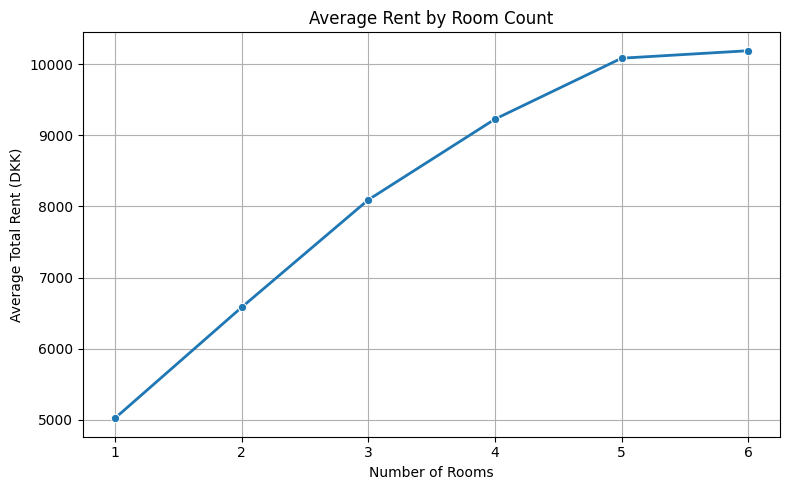

In [ ]:
# 24.Plot the average total rent based on the number of rooms.
average_rent_by_room = (
    tenancies_gold.groupby("Rooms")["TotalRent"].mean().reset_index(name="AvgTotalRent")
)



plt.figure(figsize=(8, 5))
sns.lineplot(

    data=average_rent_by_room, x="Rooms", y="AvgTotalRent", marker="o", linewidth=2
)



plt.title("Average Rent by Room Count")


plt.xlabel("Number of Rooms")



plt.ylabel("Average Total Rent (DKK)")


plt.grid(True)


plt.tight_layout()


plt.show()